# Milestone 1 Assignment

## Background

    The capstone project focuses on diaper manufacturing quality. In the Lesson 01 assignment, you discovered how the diaper manufacturing process works. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.

    For this capstone project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository. The set is originally for semiconductor manufacturing, but in our case, we will assume that it is for the diaper manufacturing process.

    The dataset consists of two files:

    (1) a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix
    (2) a labels file listing the classifications and date time stamp for each example
    
    Reference
    Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Instructions

    Assume the 591 attributes represent different sensors readings across the manufacturing process. 

    Using the SECOM dataset, create a new notebook, and perform each of the following tasks and answer the related questions:

    (1) Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
    (2) Read and merge data
    (3) Clean and prepare data 
    (4) Visually explore data
    (5) Handle class imbalance problem
    (6) Apply feature selection techniques to reduce dimensionality of data
    (7) What are your initial findings? Describe them in a summary section

### (1) Refine your data understanding and prepare a DFD of solving the manufacturing quality problem

# 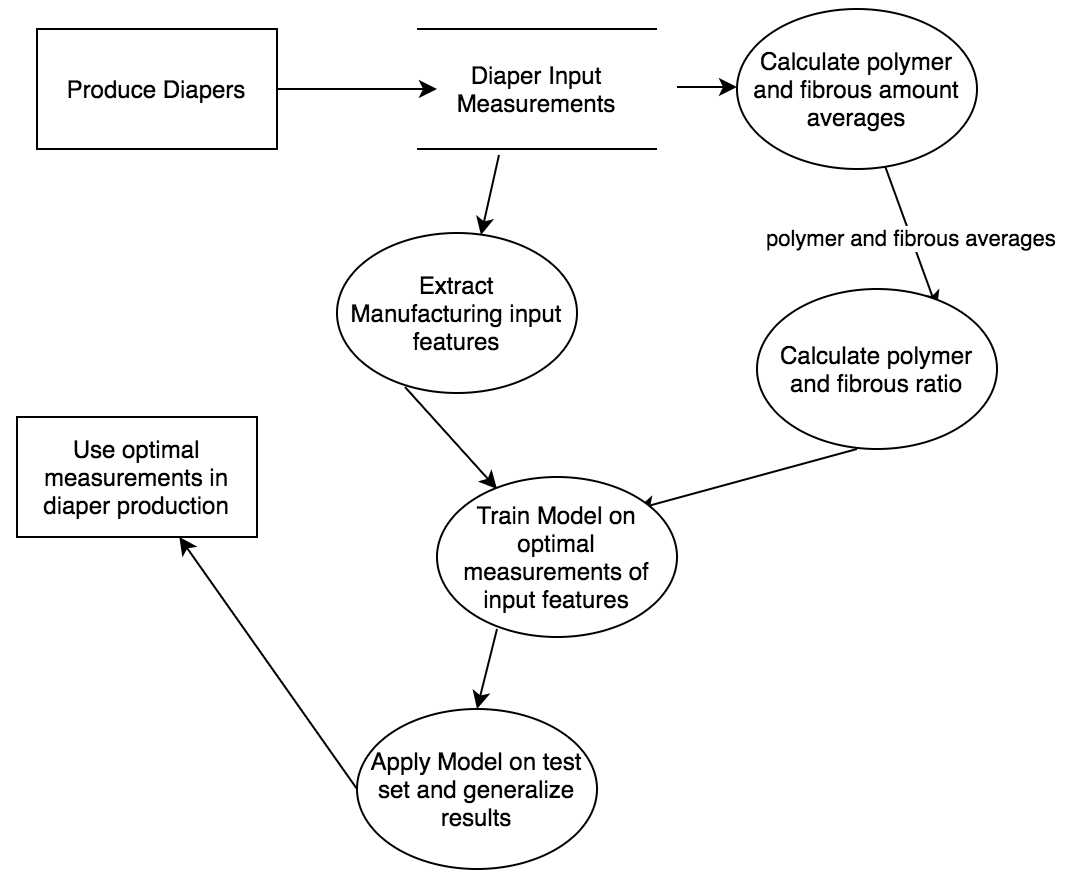

### (2) Read and merge data

In [1]:
# Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.feature_selection import RFE

#Plot styling

import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

In [2]:
# Define Functions

def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval    
    pyplot.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    pyplot.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)

In [3]:
# Load dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
names = ["feature" + str(x) for x in range(1, 591)]
secom_var = pd.read_csv(url, sep=" ", names=names, na_values = "NaN") 
 
 
url_l = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
secom_labels = pd.read_csv(url_l,sep=" ",names = ["classification","date"],parse_dates = ["date"],na_values = "NaN")

#Merging the two datasets

data = pd.merge(secom_var, secom_labels,left_index=True,right_index=True)
data.describe()
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


### (3) Clean and prepare data 

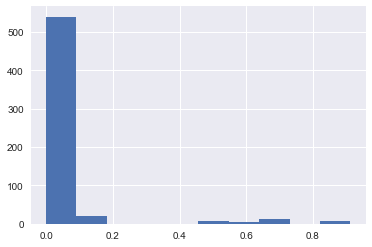

In [4]:
# Analyzing nulls

data.isnull().sum().sum()
datan = data.isnull().sum()/len(data)
datan.describe()
datan.hist()

### Comments:

    One column has alot of nulls, while a few columns have very few nulls.

In [5]:
# Replacing Nulls

data = data.replace(to_replace= float('NaN'), value=float(0))
data_null = data.isnull().sum()
print(data_null)
print("There are 0 columns with missing data")

feature1          0
feature2          0
feature3          0
feature4          0
feature5          0
feature6          0
feature7          0
feature8          0
feature9          0
feature10         0
feature11         0
feature12         0
feature13         0
feature14         0
feature15         0
feature16         0
feature17         0
feature18         0
feature19         0
feature20         0
feature21         0
feature22         0
feature23         0
feature24         0
feature25         0
feature26         0
feature27         0
feature28         0
feature29         0
feature30         0
                 ..
feature563        0
feature564        0
feature565        0
feature566        0
feature567        0
feature568        0
feature569        0
feature570        0
feature571        0
feature572        0
feature573        0
feature574        0
feature575        0
feature576        0
feature577        0
feature578        0
feature579        0
feature580        0
feature581        0


#### Comments:

    I replaced the null values with a value of 0. 

### (4) Visually explore data

#### Histogram

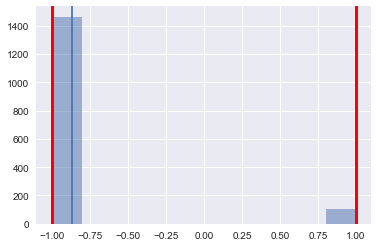

In [6]:
# Classificaion

price_hist = plot_hist(data.loc[:,'classification'])
plt.show(price_hist)

#### Comments:

    

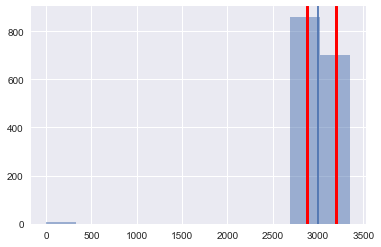

In [7]:
# Feature 1

price_hist = plot_hist(data.loc[:,'feature1'])
plt.show(price_hist)

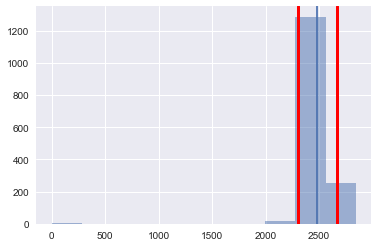

In [8]:
# Feature 2

price_hist = plot_hist(data.loc[:,'feature2'])
plt.show(price_hist)

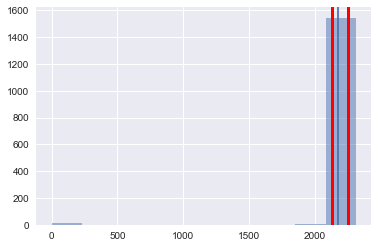

In [9]:
# Feature 3

price_hist = plot_hist(data.loc[:,'feature3'])
plt.show(price_hist)

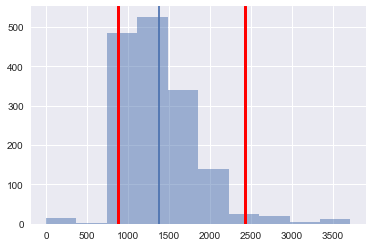

In [10]:
# Feature 4

price_hist = plot_hist(data.loc[:,'feature4'])
plt.show(price_hist)

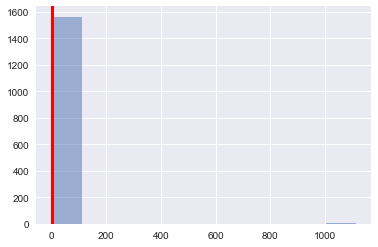

In [11]:
# Feature 5

price_hist = plot_hist(data.loc[:,'feature5'])
plt.show(price_hist)

#### Comments:
    
    The majority of the top 5 features have skewed distributions which may indicate potential skew issues with the dataset. Feature 4 appears to have a somewhat normal distribution

(0.0, 3000.0)

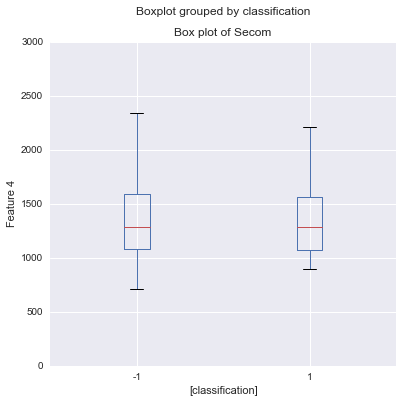

In [12]:
# Grouped Box Plot of Feature 4

fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
data.loc[:,['classification','feature4']].boxplot(by = 'classification', ax = ax)
ax.set_title('Box plot of Secom') # Give the plot a main title
ax.set_ylabel('Feature 4')# Set text for y axis
ax.set_ylim(0.0, 3000.0) # Set the limits of the y axis

(2750.0, 3250.0)

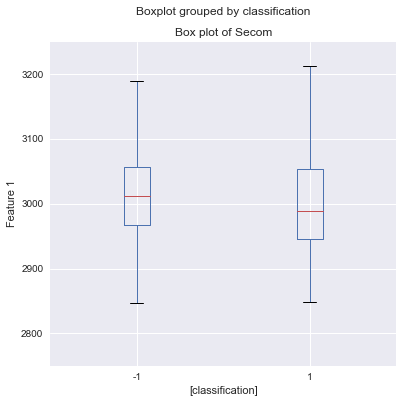

In [13]:
# Grouped Box Plot of Feature 1

fig = plt.figure(figsize=(6, 6)) # Define plot area
ax = fig.gca() # Define axis 
data.loc[:,['classification','feature1']].boxplot(by = 'classification', ax = ax)
ax.set_title('Box plot of Secom') # Give the plot a main title
ax.set_ylabel('Feature 1')# Set text for y axis
ax.set_ylim(2750.0, 3250.0) # Set the limits of the y axis

#### Comments:

    

Text(0.5,0,'Classification')

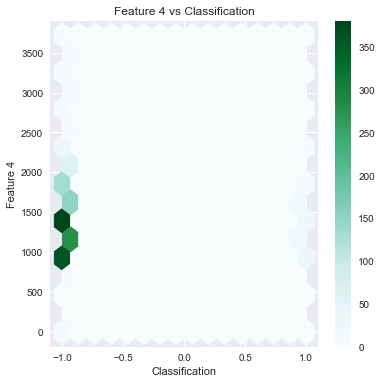

In [14]:
#Hexbin Plot - Feature 4 vs Classification

ax = plt.figure(figsize=(6, 6)).gca() # define axis
data.plot.hexbin(x = 'classification', y = 'feature4', gridsize = 15, ax = ax)
ax.set_title('Feature 4 vs Classification') # Give the plot a main title
ax.set_ylabel('Feature 4')# Set text for y axis
ax.set_xlabel('Classification')

Text(0.5,0,'Classification')

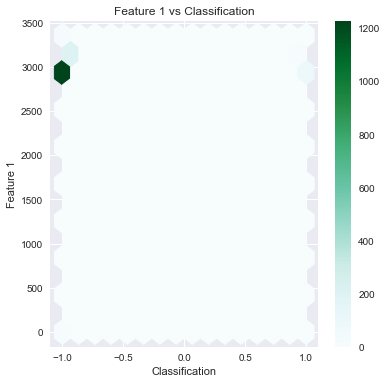

In [15]:
#Hexbin Plot - Feature 1 vs Classification

ax = plt.figure(figsize=(6, 6)).gca() # define axis
data.plot.hexbin(x = 'classification', y = 'feature1', gridsize = 15, ax = ax)
ax.set_title('Feature 1 vs Classification') # Give the plot a main title
ax.set_ylabel('Feature 1')# Set text for y axis
ax.set_xlabel('Classification')

#### Commments:

    The hexbin plot shows that the majority of values are concentrated in the -1 value for classification. For feature one values are mostly concentrated between 1000 and 2000. While Feature 1 has values all concentrated within 2750 to 3250.

### (5) Handle class imbalance problem

In [16]:
# Define the target and features:

target_label = 'classification'
non_feature = 'date'
feature_labels = [x for x in data.columns if x not in [target_label]+ [non_feature]]

# One-hot encode inputs

data_expanded = pd.get_dummies(data, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(data_expanded.shape))

# Get target and original x-matrix

y = data[target_label]
x = data.as_matrix(columns=feature_labels)

DataFrame one-hot-expanded shape: (1567, 592)


/Users/matt.denko/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [17]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                  test_size=0.3,random_state=42) # 70% training and 30% test

In [18]:
# model

gnb = GaussianNB()

# train the model on the training sets only

gnb_model = gnb.fit(X_train, y_train)

In [19]:
#Predict the response for test dataset

y_pred = gnb.predict(X_test)

#Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.14225053078556263


In [20]:
# Modify Class Imbalance

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(x, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({-1: 1463, 1: 1463})


In [21]:
# Use the same model on updated data
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, 
                                  test_size=0.3,random_state=42) # 70% training and 30% test

In [22]:
# model

gnb = GaussianNB()

# train the model on the training sets only

gnb_model = gnb.fit(X_train, y_train)

In [23]:
#Predict the response for test dataset

y_pred = gnb.predict(X_test)

#Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.571753986332574


#### Comments:

    By applying the SMOTE method to handle class imbalanace the accuracy of the model increased from .14 to .57, this indicates that there was some issue with oversampling in the dataset.

### (6) Apply feature selection techniques to reduce dimensionality of data

#### Comments:

    The feature selection techinque that I will be applying to reduce the dimensionality of the dataset is recursive feature elimination. I am going to choose the top 5 features using recursive feature elimiation and re-run the same model. 

In [ ]:
# Recursive Feature Elimination

estimator = LinearRegression()
selector = RFE(estimator, 5, step=1)#select 5 features. Step=1 means each step only remove 1 variable from the model
selector = selector.fit(x, y)
print(selector.support_) # The mask of selected features.
print(selector.ranking_) # selected features are ranked 1. The 6th is the one that is removed first,
                         # 2nd is the one that is removed last
selector.ranking_

#### Comments:

    The top 5 features selected are 96, 173, 175, 308, 310. I will now rerun the model only using those features.

In [ ]:
# Define the target and features:

target_label = 'classification'
non_feature = 'date'
feature_labels = ['feature96','feature173','feature175','feature308','feature310']

# One-hot encode inputs

data_expanded = pd.get_dummies(data, drop_first=True)
print('DataFrame one-hot-expanded shape: {}'.format(data_expanded.shape))

# Get target and original x-matrix

y = data[target_label]
x = data.as_matrix(columns=feature_labels)

In [ ]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                  test_size=0.3,random_state=42) # 70% training and 30% test

In [ ]:
# model

gnb = GaussianNB()

# train the model on the training sets only

gnb_model = gnb.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset

y_pred = gnb.predict(X_test)

#Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Comments: 

    The model accuracy increased from .57 to .93 after using recursive feature selection to reduce the amount of features to only the top 5. The model is clearly more accurate, however the explainability of it is much lower given there are fewer factors predicting the outcome.

## (7) What are your initial findings? Describe them in a summary section

#### Comments:

    I originally ran a model using all 591 features to predict whether or not a quality diaper was produced. This model had very low accuracy. To improve the model, I then used a SMOTE method to handle class imbalance, this improved the accuracy significantly however it was still only .57. I then used recursive feature selection to handle the issue of overfitting. This improved the accuracy to .93. This indicates that overfitting is a huge issue in this dataset and that feature engineering is key to finding a model that is not too complex. In my model I may simplied too far, however it is clear from the increased accuracy that there are many features in this model that do not provide value in predicting whether a diaper is of good quality or not.